##Get GNSS values for lake survey

This guide helps to obtain the WSE for lakes when using Septrentrio GNSS
Steps:
Pre steps
0.0. Extract the Septentrio receivers' file .SBF
0.1. Prepare the file with the field data format
1. Convert native GNSS data to the Receiver Independent Exchange Format (RINEX) file type.
1.2. For the conversion use use SBF Converter, which is part of the Septentrio RxTools software package, which is freely available via the septentrio website. 
2. RINEX file is submitted for postprocessing using PPP software: https://webapp.geod.nrcan.gc.ca/geod/tools-outils/ppp.php.
3. Once downloading the files, use this script to:
3.1. Read the single or multiple csv files generated by the ppp software
3.2. If single file, only filter data in the valid time
3.3. If multiple file, unify the data and filter data in the valid time
3.4. Get the orthometric height using the software 
     NOTE: Specify the Geoid model used for this calculation. A useful resourse https://observablehq.com/@cehanagan/geoid-height-calculator#understanding-the-geoid-calculation
3.5. Get the median height of the Antenna (mH) and the standard deviation of the antenna heights (stdH)
3.6. Subtract the median height from the antenna to the water surface (mHA) from the orthometric height. NOTE: I'm using the median, but the mean is also used
3.7. Calculate the standard deviation of the antenna height (stdA)
3.8. Calculate the mean error (stdH+stdA+0.01 m). where 0.01 is the absolute error of the antenna heights
3.9. Prepare output results

In [29]:
#Add the antena to files
#open all the files
#Seach for line 7 (starting from line 1)
#Replace line 
'Unknown             Unknown                                 ANT # / TYPE        '
#with 
'Unknown             SEPPOLANT_X_MF                          ANT # / TYPE        '
#Save the file
import glob
import pandas as pd
import numpy as np

In [15]:
dir='../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/'
all_files = glob.glob(dir+'RINEX/*.obs')
all_files

['../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG2_SEPT236x.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237v.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG1_SEPT2360_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237p.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG2_SEPT235x_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237x_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22236_LOG2_SEPT236r_formatted.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG1_SEPT2350.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22235_LOG2_SEPT235x.obs',
 '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/RINEX/22237_LOG2_SEPT237x.obs',
 '../data/

In [16]:

for fname in all_files:
    with open(fname, 'r') as f:
        fcontent=f.readlines()
        fcontent[6]= 'Unknown             SEPPOLANT_X_MF                          ANT # / TYPE        \n'
        fnew_name=fname[:-4]+'_formatted.obs'
        nf=open(fnew_name, 'w')
        nf.writelines(fcontent)
        f.close()
        nf.close()
        continue
        

22152_LOG2_20220601_Day3B_formatted.obs	graphics	residuals	GPS & GLONASS	NRCan/IGS Final	
Warning : Ambiguity Resolution has been deactivated since your phase modulations are not aligned. All phase observations must be aligned in RINEX 3.01 and later files and the new SYS / PHASE SHIFT header is mandatory. If the phase alignment is not known, then the observation data should not be published in a RINEX 3.0x file. In order to facilitate data processing, phase observations stored in RINEX files must be consistent across all satellites of a satellite system and across each frequency band.


22235_LOG1_SEPT2350_formatted.obs	graphics	residuals	GPS & GLONASS	NRCan/IGS Final	
Warning : Ambiguity Resolution has been deactivated since your phase modulations are not aligned. All phase observations must be aligned in RINEX 3.01 and later files and the new SYS / PHASE SHIFT header is mandatory. If the phase alignment is not known, then the observation data should not be published in a RINEX 3.0x file. In order to facilitate data processing, phase observations stored in RINEX files must be consistent across all satellites of a satellite system and across each frequency band.
Warning : Approximate position in RINEX header record was not used. Current solution is using a priori position initialized using a pseudo-range only solution.

22235_LOG2_SEPT235v_formatted.obs	graphics	residuals	GPS & GLONASS	NRCan/IGS Final	
Warning : Ambiguity Resolution has been deactivated since your phase modulations are not aligned. All phase observations must be aligned in RINEX 3.01 and later files and the new SYS / PHASE SHIFT header is mandatory. If the phase alignment is not known, then the observation data should not be published in a RINEX 3.0x file. In order to facilitate data processing, phase observations stored in RINEX files must be consistent across all satellites of a satellite system and across each frequency band.

In [22]:
#1. Read the master file
#2. Read the files from PPP
#2.1 Distinguish between 15 s and 1 s measurements LOG1 vs LOG2

import os
from fnmatch import fnmatch

root = '../data/GNSS/converted_from_RxTools-20230110T220134Z-alberta/ppp_output/'
pattern = "*.csv"
df_all_15s=pd.DataFrame()
df_all_1s=pd.DataFrame()
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            #print()
            file_info=name.split('_')
            date=file_info[0]
            type_time=file_info[1]
            df=pd.read_csv(os.path.join(path, name), sep=',')
            if type_time=='LOG1':
                df_all_15s=pd.concat([df_all_15s, df])
            else:
                df_all_1s=pd.concat([df_all_1s, df])
            


<AxesSubplot: >

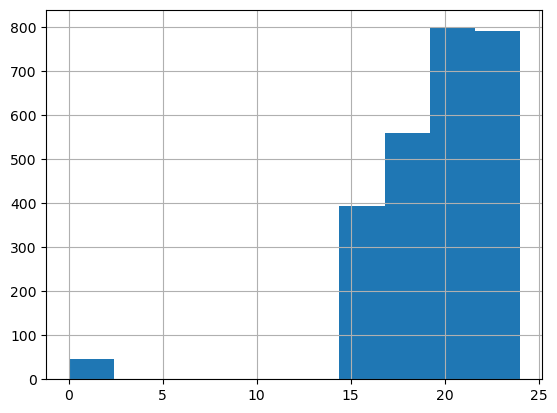

In [70]:
df_all_15s.decimal_hour.hist()

In [28]:
#Read notes file
df_lakes=pd.read_csv(root+'notes.csv')


,Lake,Start_End,Right,Left,Back,Folder,File id,Date,Time,Time Zone,UTC,decimal_utc,day_of_year,Notes,Notes on peoples interest
0,Peach Lake,S,66.0,66.0,66.0,22150,"Day1, Day1A, Day1B, Day1C",5/30/2022,15:03,UTC-04,19:03,19.01,150,Evevation reported by the citizens 5030.5 ft,NaN
1,Peach Lake,E,66.0,66.0,66.0,22150,"Day1, Day1A, Day1B, Day1C",5/30/2022,16:04,UTC-04,20:04,20.01,150,NaN,NaN
2,Cossayuna Lake,S,53.0,53.0,53.0,22151,"Day2A, Day2B and Day2C",5/31/2022,9:55,UTC-04,13:55,13.01,151,NaN,NaN
3,Cossayuna Lake,E,53.0,53.0,53.0,22151,"Day2A, Day2B and Day2C",5/31/2022,11:05,UTC-04,15:05,15.01,151,The picture of the line level 24'' avobe 3.09 ...,NaN
4,Roquette Lake,S,54.0,54.0,54.0,22151,"Day2, Day2F, Day2G",5/31/2022,18:42,UTC-04,22:42,22.02,151,NaN,NaN
5,Roquette Lake,E,54.0,54.0,54.0,22151,"Day2, Day2F, Day2G",5/31/2022,19:38,UTC-04,23:38,23.02,151,Readings in the gauge 4.35 beginning and 4.34 ...,NaN
6,Eagle Pond,S,54.0,54.0,54.0,22151,Day2D and Day2E,5/31/2022,15:15,UTC-04,19:15,19.01,151,NaN,NaN
7,Eagle Pond,E,54.0,54.0,54.0,22151,Day2D and Day2E,5/31/2022,16:14,UTC-04,20:14,20.01,151,NaN,NaN
8,Diken Pond,S,54.0,54.0,54.0,22152,"Day3, Day1A, Day3B",6/1/2022,11:46,UTC-04,15:46,15.01,152,NaN,NaN
9,Diken Pond,E,54.0,54.0,54.0,22152,"Day3, Day1A, Day3B",6/1/2022,12:44,UTC-04,16:44,16.01,152,Eastern Hemlock is the tree I liked,We did not talk much about interest with the p...


In [49]:
df_lakes['median_h']=[np.median([x[1][2],x[1][3],x[1][4]]) for x in df_lakes.iterrows()]
df_lakes['std_h']=[np.std([x[1][2],x[1][3],x[1][4]]) for x in df_lakes.iterrows()]

In [74]:
#list of lakes in Alberta

list_lakes=df_lakes.loc[df_lakes['day_of_year']>=235,'Lake'].unique()
list_lakes

array(['Skeleton Lake', 'Amisk Lake', 'Goose Lake', 'Walter', 'Oster',
       'Tawayik', 'Astotin', 'Bennett', 'Miguelon', 'Islet', 'Half Moon'],
      dtype=object)

In [77]:
#For each lake
#Get date, median heigth, std_height at the start and end time
#filter df15s and df1s
date_fd='decimal_hour'

for lake in list_lakes:
    start_row=((df_lakes['Lake']==lake)&(df_lakes['Start_End']=='S'))
    end_row=((df_lakes['Lake']==lake)&(df_lakes['Start_End']=='E'))    
    
    start_date=df_lakes.loc[start_row, 'decimal_utc'].iloc[0]
    end_date=df_lakes.loc[end_row, 'decimal_utc'].iloc[0]
    
    start_antena_H=df_lakes.loc[start_row, 'median_h'].iloc[0]
    end_antena_H=df_lakes.loc[end_row, 'median_h'].iloc[0]
    
    start_antena_stdH=df_lakes.loc[start_row, 'std_h'].iloc[0]
    end_antena_stdH=df_lakes.loc[end_row, 'std_h'].iloc[0]
    
    #Filter df_all_15s and df_all_1s
    df_gps_lake_15s=df_all_15s.loc[(df_all_15s[date_fd]>=start_date)&(df_all_15s[date_fd]<=end_date)]
    df_gps_lake_1s=df_all_1s.loc[(df_all_1s[date_fd]>=start_date)&(df_all_1s[date_fd]<=end_date)]
    print(lake,df_gps_lake_15s.shape)
    print(lake,df_gps_lake_1s.shape)
    
    print(start_date, type(start_date))
    print(end_date, type(end_date))

Skeleton Lake (280, 7)
Skeleton Lake (4264, 7)
20.01 <class 'numpy.float64'>
21.02 <class 'numpy.float64'>
Amisk Lake (218, 7)
Amisk Lake (3285, 7)
22.02 <class 'numpy.float64'>
23.02 <class 'numpy.float64'>
Goose Lake (434, 7)
Goose Lake (6579, 7)
16.01 <class 'numpy.float64'>
17.01 <class 'numpy.float64'>
Walter (0, 7)
Walter (1, 7)
18.01 <class 'numpy.float64'>
18.01 <class 'numpy.float64'>
Oster (176, 7)
Oster (2641, 7)
19.01 <class 'numpy.float64'>
20.01 <class 'numpy.float64'>
Tawayik (280, 7)
Tawayik (4264, 7)
20.01 <class 'numpy.float64'>
21.02 <class 'numpy.float64'>
Astotin (0, 7)
Astotin (0, 7)
23.02 <class 'numpy.float64'>
0.02 <class 'numpy.float64'>
Bennett (35, 7)
Bennett (523, 7)
15.01 <class 'numpy.float64'>
16.01 <class 'numpy.float64'>
Miguelon (411, 7)
Miguelon (6266, 7)
18.01 <class 'numpy.float64'>
19.01 <class 'numpy.float64'>
Islet (274, 7)
Islet (4156, 7)
20.01 <class 'numpy.float64'>
21.01 <class 'numpy.float64'>
Half Moon (218, 7)
Half Moon (3285, 7)
22.02 <c